In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np

In [126]:
train_df = pd.read_csv("Traindata.csv")
train_df.shape

(150150, 9)

In [127]:
train_df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [128]:
train_df.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [129]:
#Since only 1 na value, it can be dropped
train_df.dropna(axis=0, inplace=True)

In [130]:
train_df.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

<AxesSubplot: >

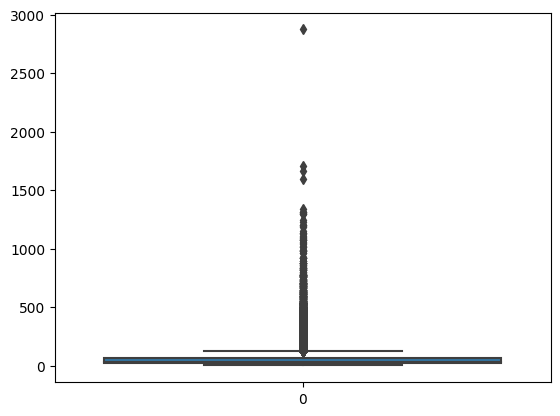

In [131]:
sns.boxplot(train_df["units_sold"])

In [132]:
train_df = train_df[train_df["units_sold"] < 1500]

<AxesSubplot: >

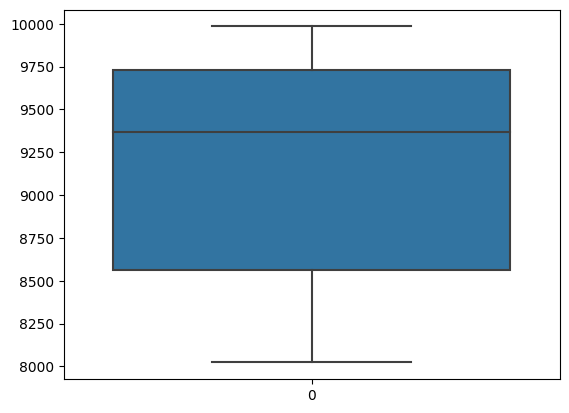

In [133]:
sns.boxplot(train_df["store_id"])

C:\Users\yash_\AppData\Local\Temp\ipykernel_21120\190525475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = train_df.corr()


<AxesSubplot: >

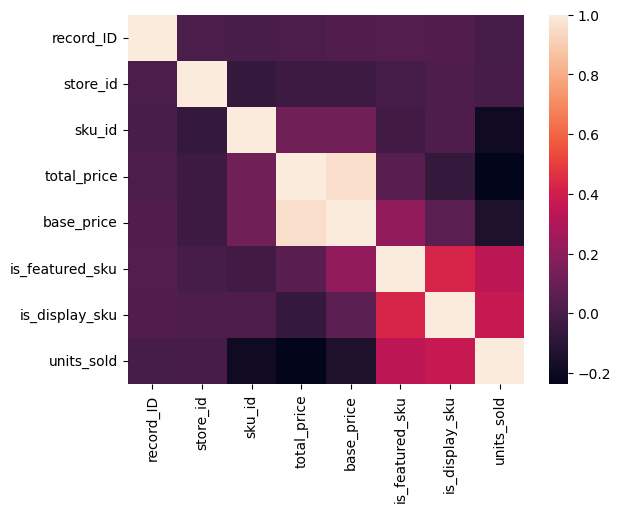

In [134]:
corr_mat = train_df.corr()
sns.heatmap(corr_mat, cmap=None, annot=None)

In [135]:
print(corr_mat["total_price"].abs().sum())
print(corr_mat["base_price"].abs().sum())

2.479609982144233
2.544163246328848


Since the overall corelation with the remaining columns is similar, we can choose base price as it has higher co-relation with units sold, which is out target

Of the remaining columns, we have "Record_id" which is an internal record, and has no significance to our prediciton, as the product itself is identified by sku_id

In [136]:
train_df.drop(columns=["total_price", "record_ID"], inplace=True)
train_df.head()

,week,store_id,sku_id,base_price,is_featured_sku,is_display_sku,units_sold
0,17-01-2011,8091,216418,111.8625,0,0,20
1,17-01-2011,8091,216419,99.0375,0,0,28
2,17-01-2011,8091,216425,133.9500,0,0,19
3,17-01-2011,8091,216233,133.9500,0,0,44
4,17-01-2011,8091,217390,141.0750,0,0,52


In [137]:
train_df.nunique()

week               130
store_id            76
sku_id              28
base_price         572
is_featured_sku      2
is_display_sku       2
units_sold         704
dtype: int64

In [138]:
train_df["week"] = pd.to_datetime(train_df["week"])
train_df.set_index('week', inplace=True)
train_df.head()

C:\Users\yash_\AppData\Local\Temp\ipykernel_21120\3272426023.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_df["week"] = pd.to_datetime(train_df["week"])


,store_id,sku_id,base_price,is_featured_sku,is_display_sku,units_sold
week,,,,,,
2011-01-17,8091,216418,111.8625,0,0,20
2011-01-17,8091,216419,99.0375,0,0,28
2011-01-17,8091,216425,133.9500,0,0,19
2011-01-17,8091,216233,133.9500,0,0,44
2011-01-17,8091,217390,141.0750,0,0,52


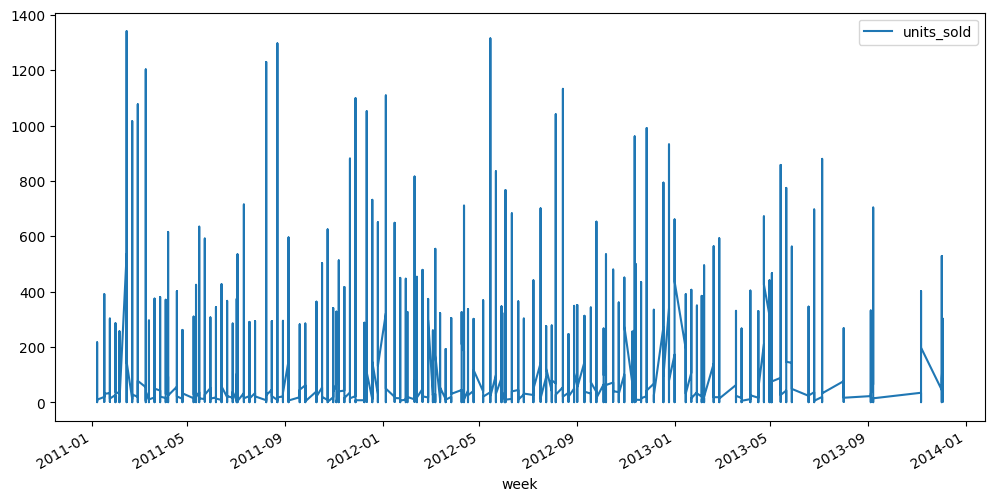

In [139]:
ax = train_df.plot(y='units_sold', figsize=(12,6))

array([[<AxesSubplot: xlabel='week'>, <AxesSubplot: xlabel='week'>],
       [<AxesSubplot: xlabel='week'>, <AxesSubplot: xlabel='week'>],
       [<AxesSubplot: xlabel='week'>, <AxesSubplot: xlabel='week'>]],
      dtype=object)

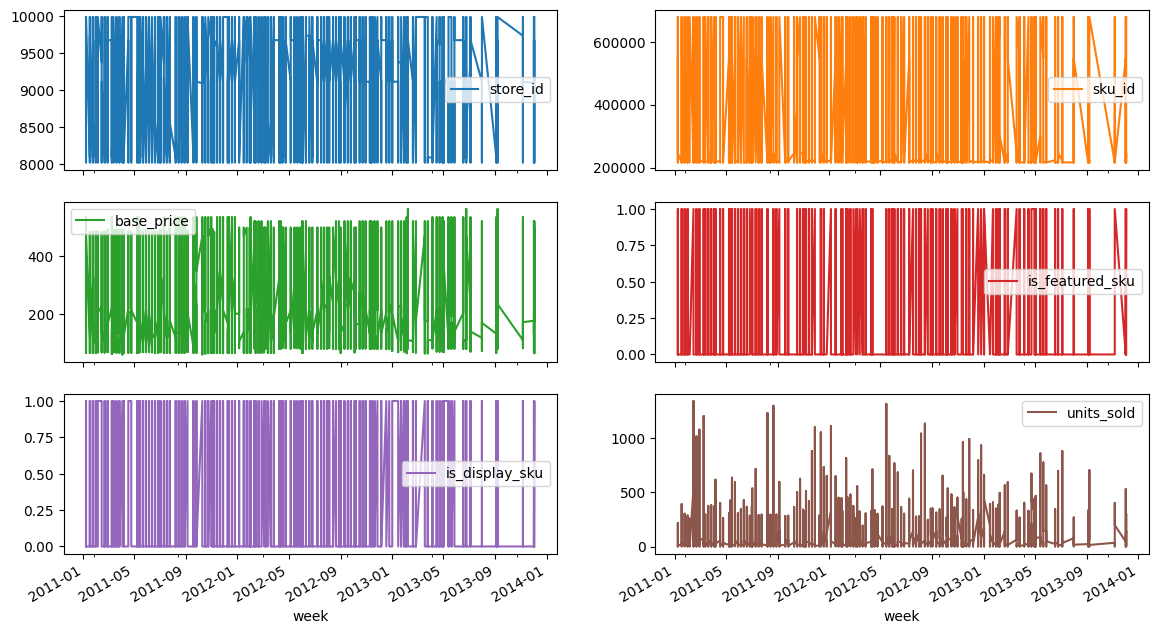

In [140]:
train_df.sort_index(inplace=True)
train_df.plot(subplots=True, layout=(3,2), figsize=(14, 8))

In [141]:
X = train_df.drop(columns=["units_sold"])
y = train_df["units_sold"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [142]:
print("Period covered in train dataset:", X_train.index.min(),X_train.index.max())
print("Period covered in test dataset:", X_test.index.min(),X_test.index.max())

Period covered in train dataset: 2011-01-08 00:00:00 2013-12-03 00:00:00
Period covered in test dataset: 2011-01-08 00:00:00 2013-12-03 00:00:00


In [143]:
model = sm.tsa.statespace.SARIMAX(endog=y_train, exog=X_train).fit()
print(model.summary())

c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             units_sold   No. Observations:               100597
Model:               SARIMAX(1, 0, 0)   Log Likelihood             -540621.797
Date:                Tue, 24 Oct 2023   AIC                        1081257.594
Time:                        10:24:44   BIC                        1081324.226
Sample:                             0   HQIC                       1081277.809
                             - 100597                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
store_id            0.0092   9.35e-05     98.232      0.000       0.009       0.009
sku_id          -9.275e-05   3.56e-06    -26.082      0.000   -9.97e-05   -8.58e-05
base_price         -0.0955      

In [144]:
mae = np.mean(np.abs(model.resid))
mae

30.54503511760908

In [145]:
y_train.describe()

count    100597.000000
mean         51.715568
std          59.447247
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        1341.000000
Name: units_sold, dtype: float64

[]

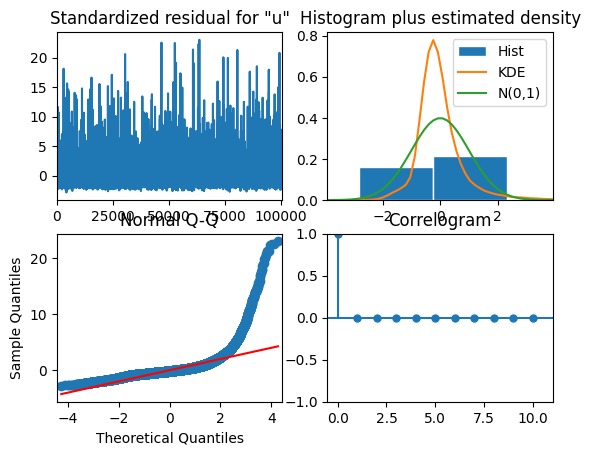

In [146]:
model.plot_diagnostics()
plt.plot()

In [150]:
startDate, endDate

(Timestamp('2011-01-08 00:00:00'), Timestamp('2013-12-03 00:00:00'))

In [153]:
startDate = X_test.index.min()
endDate = X_test.index.max()
preds= model.predict(exog=X_test)

In [154]:
preds

week
2011-01-24     37.555673
2013-04-30     46.902365
2011-03-10     19.613036
2013-02-07     53.170444
2012-08-14     19.235756
                 ...    
2013-01-15     32.207353
2012-10-04     52.349817
2013-04-23     58.287268
2013-11-06     56.053631
2013-01-29    136.278026
Name: predicted_mean, Length: 100597, dtype: float64

In [204]:
test_df = pd.read_csv("DataSetRetail.csv")
results_df = pd.DataFrame(columns=["record_ID", "units_sold"])
results_df["record_ID"] = test_df["record_ID"]
test_df.shape

(13860, 8)

In [205]:
test_df.drop(columns=["total_price", "record_ID"], inplace=True)
test_df["week"] = pd.to_datetime(test_df["week"])
test_df.set_index('week', inplace=True)

C:\Users\yash_\AppData\Local\Temp\ipykernel_21120\1722128335.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_df["week"] = pd.to_datetime(test_df["week"])


In [206]:
X_train

,store_id,sku_id,base_price,is_featured_sku,is_display_sku
week,,,,,
2011-01-24,8562,223245,213.0375,0,0
2013-04-30,9880,223245,241.5375,0,0
2011-03-10,8058,378934,201.6375,0,0
2013-02-07,9442,216233,141.0750,0,0
2012-08-14,9456,245338,469.5375,0,0
...,...,...,...,...,...
2013-01-15,9479,378934,205.9125,0,0
2012-10-04,9221,216233,128.2500,0,0
2013-04-23,9456,216418,88.3500,0,0


In [207]:
test_df

,store_id,sku_id,base_price,is_featured_sku,is_display_sku
week,,,,,
2013-07-16,8091,216418,108.3000,0,0
2013-07-16,8091,216419,109.0125,0,0
2013-07-16,8091,216425,133.9500,0,0
2013-07-16,8091,216233,133.9500,0,0
2013-07-16,8091,217390,176.7000,0,0
...,...,...,...,...,...
2013-01-10,9984,223245,241.5375,0,0
2013-01-10,9984,223153,240.8250,0,0
2013-01-10,9984,245338,401.8500,1,1


In [208]:
start=test_df.index.max()
start

Timestamp('2013-10-09 00:00:00')

In [209]:
preds = model.forecast(steps=test_df.shape[0], exog=test_df)

c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [214]:
len(preds.values)

results_df["units_sold"] = np.asarray(preds.values, dtype='int')

In [215]:
results_df

,record_ID,units_sold
0,212645,43
1,212646,43
2,212647,41
3,212648,41
4,212649,37
...,...,...
13855,232281,47
13856,232282,47
13857,232285,130
13858,232286,22


In [216]:
results_df.to_csv("Outputs.csv",index=False )